In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='balance', ylabel='income'>

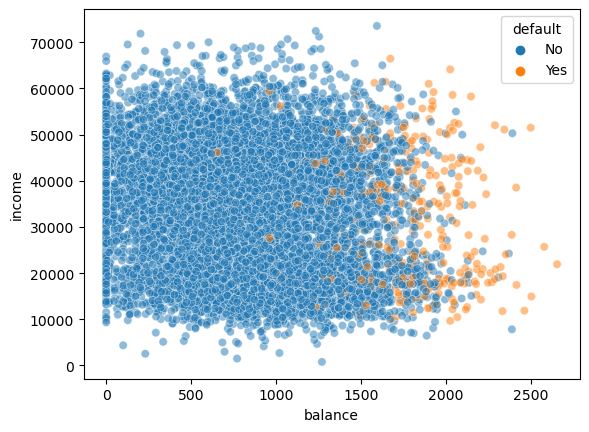

In [93]:
df = pd.read_csv('../Data/Default.csv')
df.head()

sns.scatterplot(data=df, x='balance', y='income', hue='default', alpha=0.5)

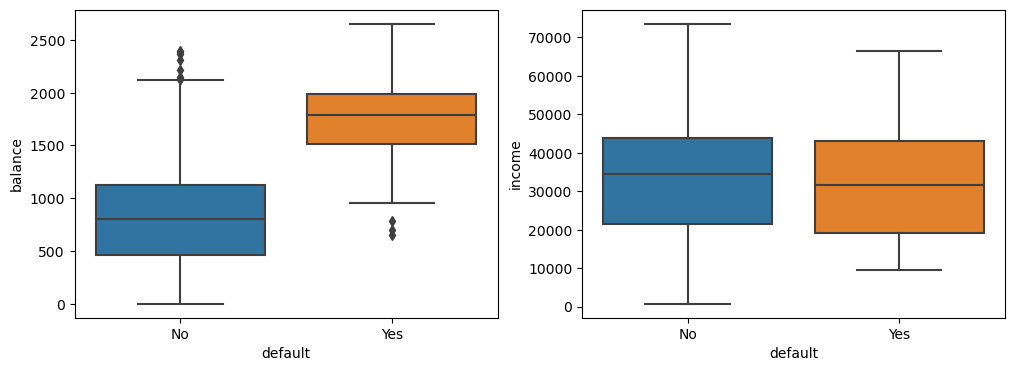

In [94]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
for ax, column in zip(ax, ['balance', 'income']):
    sns.boxplot(data=df, x='default', y=column, ax=ax)

In [95]:
pd.get_dummies(df, columns=['default', 'student'], dtype=int).head()

,balance,income,default_No,default_Yes,student_No,student_Yes
0,729.526495,44361.625074,1,0,1,0
1,817.180407,12106.134700,1,0,0,1
2,1073.549164,31767.138947,1,0,1,0
3,529.250605,35704.493935,1,0,1,0
4,785.655883,38463.495879,1,0,1,0


In [96]:
df = pd.get_dummies(df, columns=['default', 'student'], dtype=float, drop_first=True)
df.head()

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,0.0,0.0
1,817.180407,12106.134700,0.0,1.0
2,1073.549164,31767.138947,0.0,0.0
3,529.250605,35704.493935,0.0,0.0
4,785.655883,38463.495879,0.0,0.0


In [97]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, Y = df.drop("default_Yes", axis="columns"), df["default_Yes"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

model = LogisticRegressionCV(penalty='l2')

model.fit(scaled_X_train, Y_train)
model.intercept_, model.coef_

(array([-6.34792307]), array([[ 2.93529569, -0.0347287 , -0.36101551]]))

In [98]:
Y_hat = model.predict(scaled_X_test)


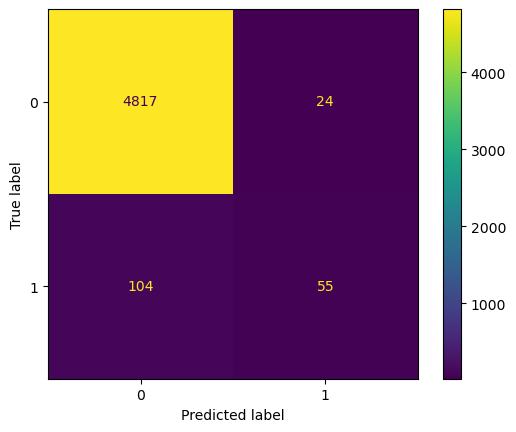

In [99]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_hat)
display = ConfusionMatrixDisplay(cm)
display.plot()

